In [1]:
import pandas as pd 
클러스터링=pd.read_csv("c:/data/project/team/revised/클러스터링.csv",encoding='cp949',index_col=0) 
편의점=pd.read_csv("c:/data/project/team/revised/최종데이터파일.csv",encoding='cp949',index_col=0) 
편의점최종=pd.merge(클러스터링,편의점).set_index('상권코드',drop=True)


In [2]:
# 가장이 군집이 많은 0 = 매출이 낮은집단
# 가장이 군집이 많은 1 = 매출이 높은집단
# 가장이 군집이 많은 2 = 매출이 중간인 집단
클러스터링['분류'].value_counts()

0    617
2    344
1     64
Name: 분류, dtype: int64

In [3]:
매출이낮은상권=편의점최종[편의점최종['분류']==0]
매출이높은상권=편의점최종[편의점최종['분류']==1]
매출이중간인상권=편의점최종[편의점최종['분류']==2]
# 편의점=pd.concat([매출이낮은상권,매출이중간인상권],axis=0)



In [4]:
print(str(매출이낮은상권['점포별월매출금액'].min())+"에서"+str(매출이낮은상권['점포별월매출금액'].max()))
print(str(매출이중간인상권['점포별월매출금액'].min())+"에서"+str(매출이중간인상권['점포별월매출금액'].max()))
print(str(매출이높은상권['점포별월매출금액'].min())+"에서"+str(매출이높은상권['점포별월매출금액'].max()))
 


5991840.25에서191087879.585
191457477.605에서363686576.185
366001786.015에서1029480596.395


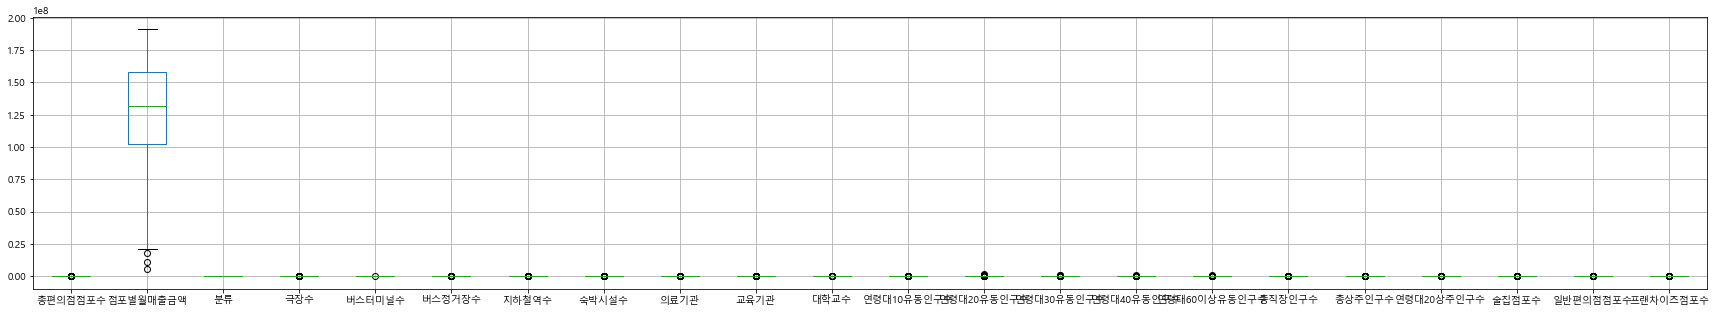

In [5]:
# 카페.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
매출이낮은상권.iloc[:,:-1].boxplot(figsize=(30,5))

In [6]:
매출이낮은상권.columns

Index(['총편의점점포수', '점포별월매출금액', '분류', '극장수', '버스터미널수', '버스정거장수', '지하철역수',
       '숙박시설수', '의료기관', '교육기관', '대학교수', '연령대10유동인구수', '연령대20유동인구수',
       '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수', '총직장인구수', '총상주인구수',
       '연령대20상주인구수', '술집점포수', '일반편의점점포수', '프랜차이즈점포수', '생존률'],
      dtype='object')

In [7]:
cols=['총편의점점포수', '점포별월매출금액', '극장수', '버스터미널수', '버스정거장수', '지하철역수',
       '숙박시설수', '의료기관', '교육기관', '대학교수', '연령대10유동인구수', '연령대20유동인구수',
       '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수', '총직장인구수', '총상주인구수',
       '연령대20상주인구수', '술집점포수', '일반편의점점포수', '프랜차이즈점포수']
X=매출이낮은상권[cols] #독립변수
y=매출이낮은상권['생존률'] #종속변수

In [8]:
# X.to_csv("c:/data/project/team/revised/최종머신러닝용1.csv",encoding='cp949')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


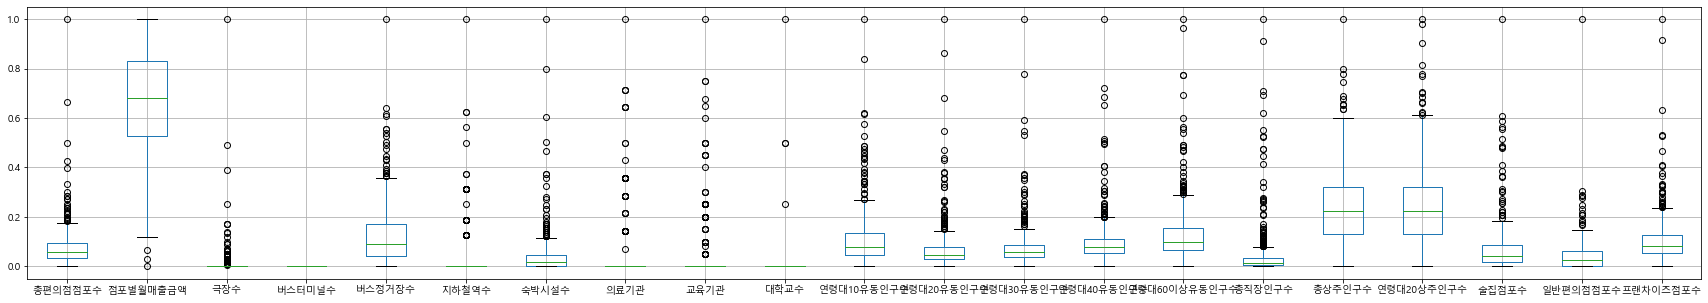

In [11]:
# 편의점.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
X_train_scaled.boxplot(figsize=(30,5))

In [12]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.644
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           4.73e-07
Time:                        16:47:07   Log-Likelihood:                 315.34
No. Observations:                 481   AIC:                            -590.7
Df Residuals:                     461   BIC:                            -507.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
총편의점점포수       -105.0644      4.906    -21.416      0.000    -114.705     -95.424
점포별월매출금액         0.0215      0.030      0.728      0.467      -0.037       0.080
극장수             -0.6568      0.189     -3.471      0.001      -1.029      -0.285
버스터미널수       -1.364e-14   8.55e-16    -15.960      0.000   -1.53e-14    -1.2e-14
버스정거장수          -0.0465      0.056     -0.830      0.407      -0.157       0.064
지하철역수           -0.0221      0.066     -0.334      0.738      -0.152       0.108
숙박시설수           -0.1049      0.124     -0.846      0.398      -0.349       0.139
의료기관            -0.0981      0.049     -2.008      0.045      -0.194      -0.002
교육기관            -0.0136      0.047     -0.290      0.772      -0.105       0.078
대학교수             0.0634      0.108      0.589      0.556      -0.148       0.275
연령대10유동인구수      -0.1345      0.101     -1.327      0.185      -0.334       0.065
연령대20유동인구수       0.1118      0.255      0.438      0.662      -0.390       0.614
연령대30유동인구수       0.0569      0.549      0.104      0.918      -1.022       1.136
연령대40유동인구수      -0.8174      0.510     -1.603      0.110      -1.819       0.185
연령대60이상유동인구수     0.4839      0.174      2.778      0.006       0.142       0.826
총직장인구수           0.1076      0.086      1.247      0.213      -0.062       0.277
총상주인구수           0.2398      0.116      2.060      0.040       0.011       0.469
연령대20상주인구수      -0.1132      0.106     -1.071      0.285      -0.321       0.095
술집점포수           -0.1615      0.111     -1.458      0.146      -0.379       0.056
일반편의점점포수        42.5605      1.970     21.605      0.000      38.689      46.432
프랜차이즈점포수        64.0231      2.965     21.596      0.000      58.197      69.849
==============================================================================
Omnibus:                       19.707   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.548
Skew:                           0.109   Prob(JB):                      0.00845
Kurtosis:                       2.345   Cond. No.                     2.44e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
19,8267.565835,총편의점점포수
18,5152.212128,프랜차이즈점포수
17,699.452032,일반편의점점포수
16,66.210905,연령대40유동인구수
15,63.686237,연령대30유동인구수
14,16.071772,연령대20유동인구수
13,12.058374,연령대60이상유동인구수
12,8.381966,총상주인구수
11,8.283794,연령대20상주인구수
10,3.709074,연령대10유동인구수


In [21]:
cols=[ '점포별월매출금액', '극장수','버스정거장수',
        '교육기관', '연령대10유동인구수', '연령대60이상유동인구수', '총상주인구수', '술집점포수', '일반편의점점포수', '프랜차이즈점포수']
X=매출이낮은상권[cols] #독립변수
y=매출이낮은상권['생존률'] #종속변수
# X.to_csv("c:/data/project/team/revised/매출낮음.csv",encoding='cp949')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


In [18]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              436.2
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                   6.55e-231
Time:                        16:47:07   Log-Likelihood:                          144.02
No. Observations:                 481   AIC:                                     -268.0
Df Residuals:                     471   BIC:                                     -226.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
점포별월매출금액         0.5073      0.027     19.125      0.000       0.455       0.559
극장수             -1.2186      0.214     -5.686      0.000      -1.640      -0.797
버스정거장수           0.1478      0.077      1.925      0.055      -0.003       0.299
교육기관             0.1087      0.065      1.671      0.095      -0.019       0.236
연령대10유동인구수      -0.1593      0.099     -1.613      0.107      -0.353       0.035
연령대60이상유동인구수     0.3024      0.133      2.276      0.023       0.041       0.563
총상주인구수           0.4368      0.056      7.735      0.000       0.326       0.548
술집점포수           -0.2606      0.142     -1.836      0.067      -0.539       0.018
일반편의점점포수         0.4803      0.196      2.454      0.014       0.096       0.865
프랜차이즈점포수         0.4684      0.151      3.094      0.002       0.171       0.766
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.270
Skew:                           0.097   Prob(JB):                        0.530
Kurtosis:                       2.839   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
9,7.993995,연령대60이상유동인구수
8,6.735031,프랜차이즈점포수
7,4.978378,점포별월매출금액
6,4.172380,술집점포수
5,3.603105,총상주인구수
4,3.501865,연령대10유동인구수
3,3.458880,일반편의점점포수
2,2.615867,버스정거장수
1,2.358891,극장수
0,1.243273,교육기관


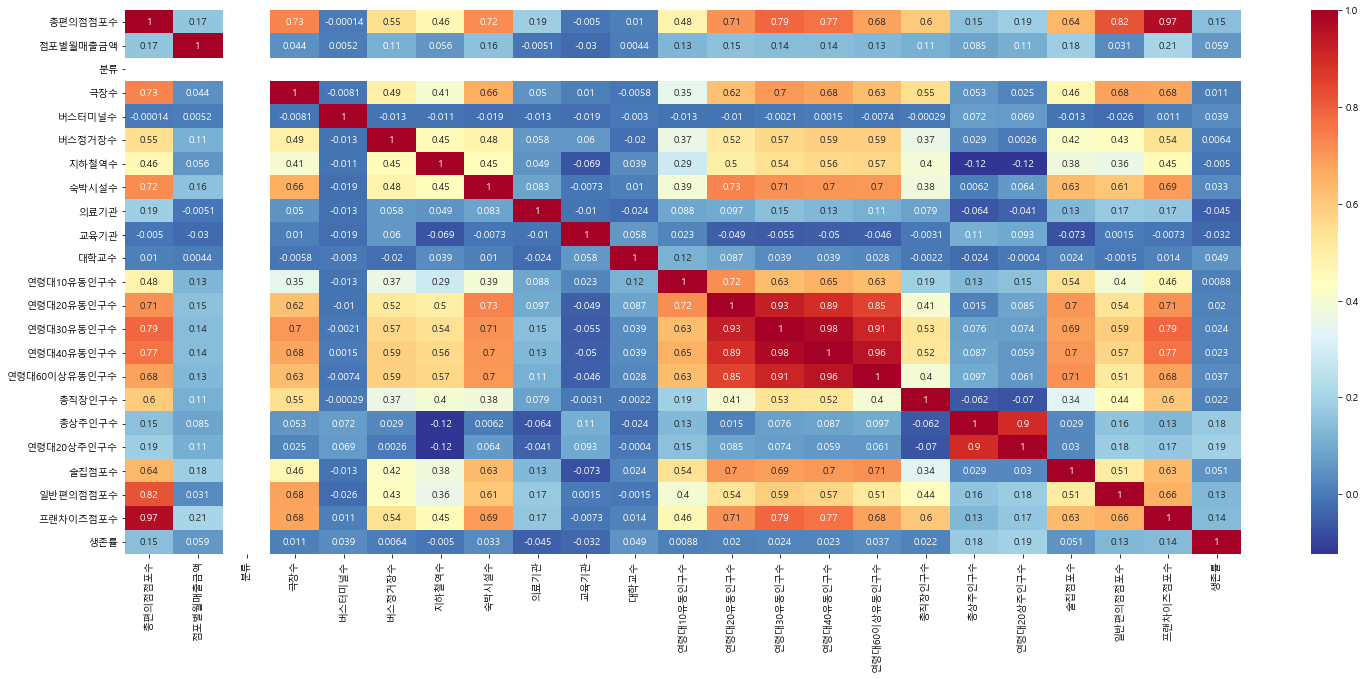

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(25,10))
sns.heatmap(매출이낮은상권.corr(), annot=True, cmap='RdYlBu_r')
plt.show()
